In [3]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=0.11 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/02/4e/5ac0b5b9a239cd3fdae187dda8ff06b0b812f671e2501bf253712278f0ac/Cython-3.0.12-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scikit-learn>=0.22 from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadat


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

#### Create the my_project directory and files within Google Drive:

In [ ]:
import sys,os
import pandas as pd
sys.path.append('/content/drive/MyDrive/my_project')

In [6]:
from model_builder import TimeSeriesForecaster

###  Load data for all symbols

In [7]:
tsla_df = pd.read_csv('/content/drive/MyDrive/my_project/TSLA_data.csv', parse_dates=True)
bnd_df = pd.read_csv('/content/drive/MyDrive/my_project/BND_data.csv', parse_dates=True)
spy_df = pd.read_csv('/content/drive/MyDrive/my_project/SPY_data.csv', parse_dates=True)

In [8]:
tsla_df=tsla_df.dropna()
tsla_df.set_index('Date', inplace=True)

bnd_df=bnd_df.dropna()
bnd_df.set_index('Date', inplace=True)

spy_df=spy_df.dropna()
spy_df.set_index('Date', inplace=True)

In [9]:
# Initialize forecaster
tsla_forecaster = TimeSeriesForecaster(tsla_df, column='Close')
bnd_forecaster = TimeSeriesForecaster(bnd_df, column='Close')
spy_forecaster = TimeSeriesForecaster(spy_df, column='Close')

In [10]:
# Prepare the data (split into train and test sets, scale the values)
tsla_forecaster.prepare_data()
bnd_forecaster.prepare_data()
spy_forecaster.prepare_data()

Data split: 2872 train, 718 test
Data split: 2872 train, 718 test
Data split: 2872 train, 718 test


### Train all models for TSLA

Training ARIMA model
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17553.051, Time=1.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17557.925, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17559.421, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17559.423, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17559.372, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17557.423, Time=1.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-17557.423, Time=1.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17555.422, Time=2.93 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17560.828, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-17558.829, Time=1.74 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-17558.829, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-17560.828, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-17556.870, Time=0.85 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - loss: 0.0184 - val_loss: 0.0050
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0016 - val_loss: 0.0054
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.0014 - val_loss: 0.0073
LSTM model training completed


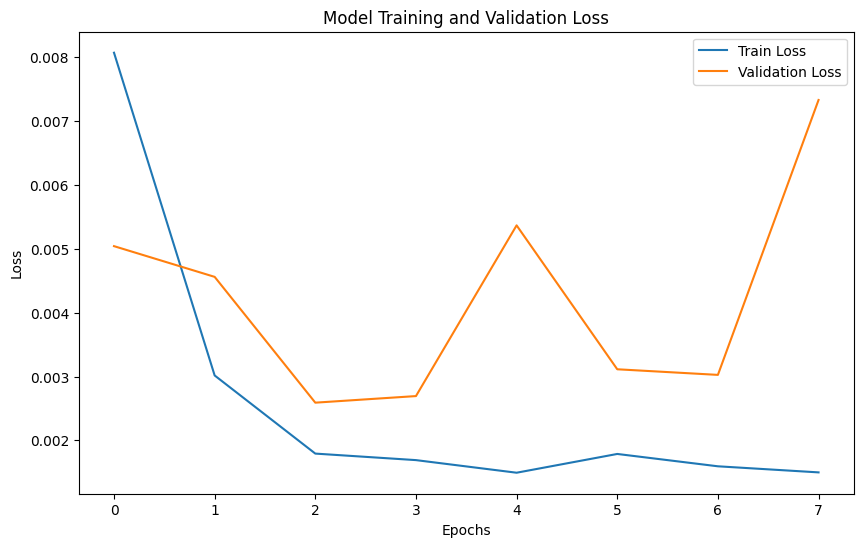

In [11]:
tsla_forecaster.train_arima()   # Train ARIMA model for TSLA
tsla_forecaster.train_sarima()  # Train SARIMA model for TSLA
tsla_forecaster.train_lstm()    # Train LSTM model for TSLA

### Train all models for BND stock symbol

Training ARIMA model
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17768.729, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17770.932, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17771.481, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17771.598, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17772.036, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17772.112, Time=1.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-17768.992, Time=0.76 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17770.786, Time=0.63 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-17771.220, Time=2.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-17770.988, Time=2.25 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-17772.970, Time=2.66 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17772.645, Time=1.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-17772.531, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-17769.994

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.1261 - val_loss: 0.0116
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0079 - val_loss: 0.0105
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0065 - val_loss: 0.0081
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0059 - val_loss: 0.0068
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0072 - val_loss: 0.0087
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0056 - val_loss: 0.0089
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0052 - val_loss: 0.0094
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0054 - val_loss: 0.0068
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0052 - val_loss: 0.0062
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0049 - val_loss: 0.0087
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0042 - val_loss: 0.0072
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0

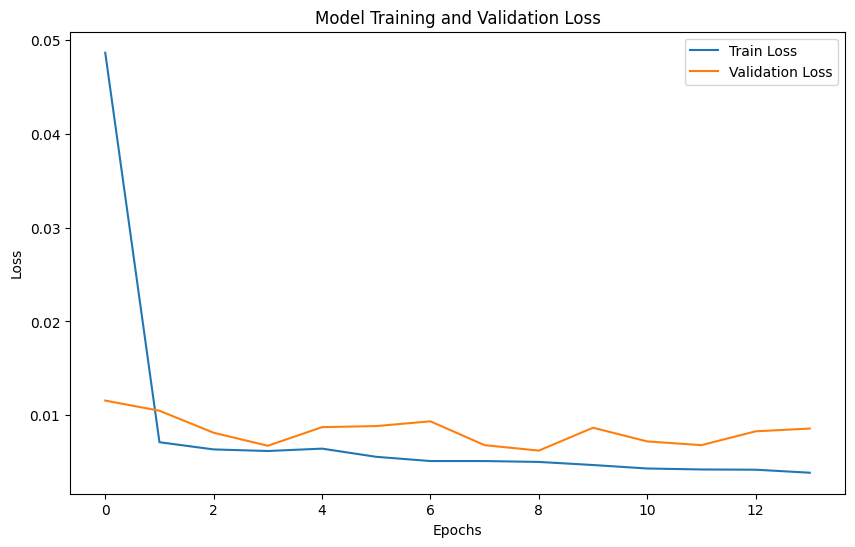

In [12]:
# Train ARIMA model for BND stock symbol
bnd_forecaster.train_arima()
# Train SARIMA model for BND stock symbol
bnd_forecaster.train_sarima()
# Train LSTM model for BND stock symbol
bnd_forecaster.train_lstm()

Training ARIMA model
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-18167.174, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18145.559, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-18165.170, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18164.687, Time=2.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18146.139, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-18161.175, Time=4.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-18161.265, Time=4.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-18167.961, Time=5.01 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-18163.006, Time=0.84 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-18179.950, Time=2.01 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-18166.563, Time=6.29 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-18164.627, Time=1.49 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-18176.767, Time=5.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-18162.759

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0429 - val_loss: 0.0038
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0034 - val_loss: 0.0039
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0042 - val_loss: 0.0030
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0

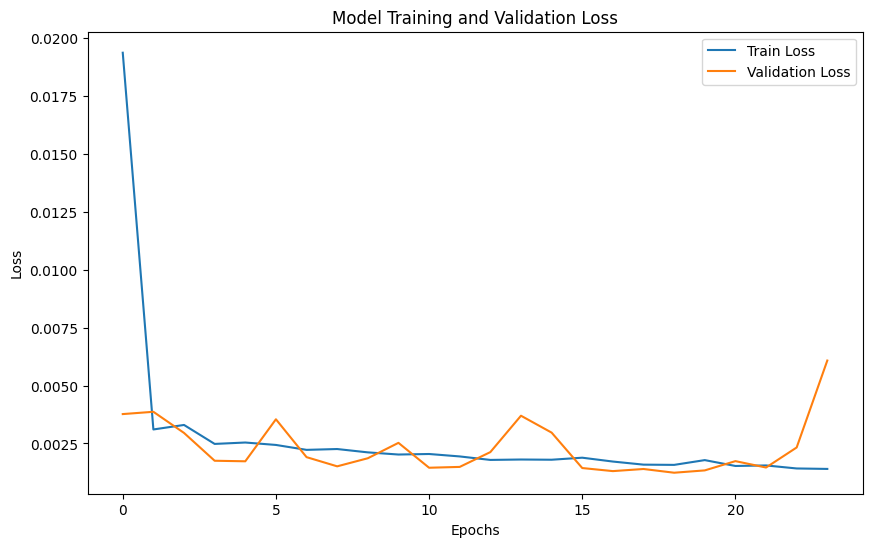

In [13]:
spy_forecaster.train_arima()   # Train ARIMA model for SPY stock symbol
spy_forecaster.train_sarima()  # Train SARIMA model for SPY stock symbol
spy_forecaster.train_lstm()    # Train LSTM model for SPY stock symbol

### Make predictions for all symbols

In [ ]:
# Make predictions
tsla_forecaster.make_prediction()
bnd_forecaster.make_prediction()
spy_forecaster.make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━

### Evaluate models for TSLA stock symbol

In [21]:
# Evaluate models for TSLA stock symbol
tsla_forecaster.evaluate_model()

ARIMA - MAE: 0.08, RMSE: 0.10, MAPE: 17.05%
SARIMA - MAE: 1.65, RMSE: 1.91, MAPE: 330.22%
LSTM - MAE: 0.11, RMSE: 0.13, MAPE: 25.11%

Model Evaluation Metrics:
     Model       MAE      RMSE        MAPE
0   ARIMA  0.082621  0.100929   17.050059
1  SARIMA  1.654342  1.913534  330.220278
2    LSTM  0.105049  0.127810   25.111013


## Evaluate models for BND stock symbol

In [22]:
# Evaluate models for BND stock symbol
bnd_forecaster.evaluate_model()

ARIMA - MAE: 0.07, RMSE: 0.09, MAPE: 120.02%
SARIMA - MAE: 2.36, RMSE: 2.75, MAPE: 3504.72%
LSTM - MAE: 0.30, RMSE: 0.31, MAPE: 574.13%

Model Evaluation Metrics:
     Model       MAE      RMSE         MAPE
0   ARIMA  0.072830  0.087379   120.015573
1  SARIMA  2.363791  2.745280  3504.719244
2    LSTM  0.295610  0.307574   574.131238


## Evaluate models for SPY stock symbol

In [23]:
# Evaluate models for SPY stock symbol
spy_forecaster.evaluate_model()

ARIMA - MAE: 0.24, RMSE: 0.31, MAPE: 21.88%
SARIMA - MAE: 1.76, RMSE: 2.01, MAPE: 169.03%
LSTM - MAE: 0.37, RMSE: 0.43, MAPE: 34.92%

Model Evaluation Metrics:
     Model       MAE      RMSE        MAPE
0   ARIMA  0.241145  0.308883   21.877344
1  SARIMA  1.758939  2.007907  169.030391
2    LSTM  0.369584  0.432308   34.917927


### Forecast plot for TSLA Asset

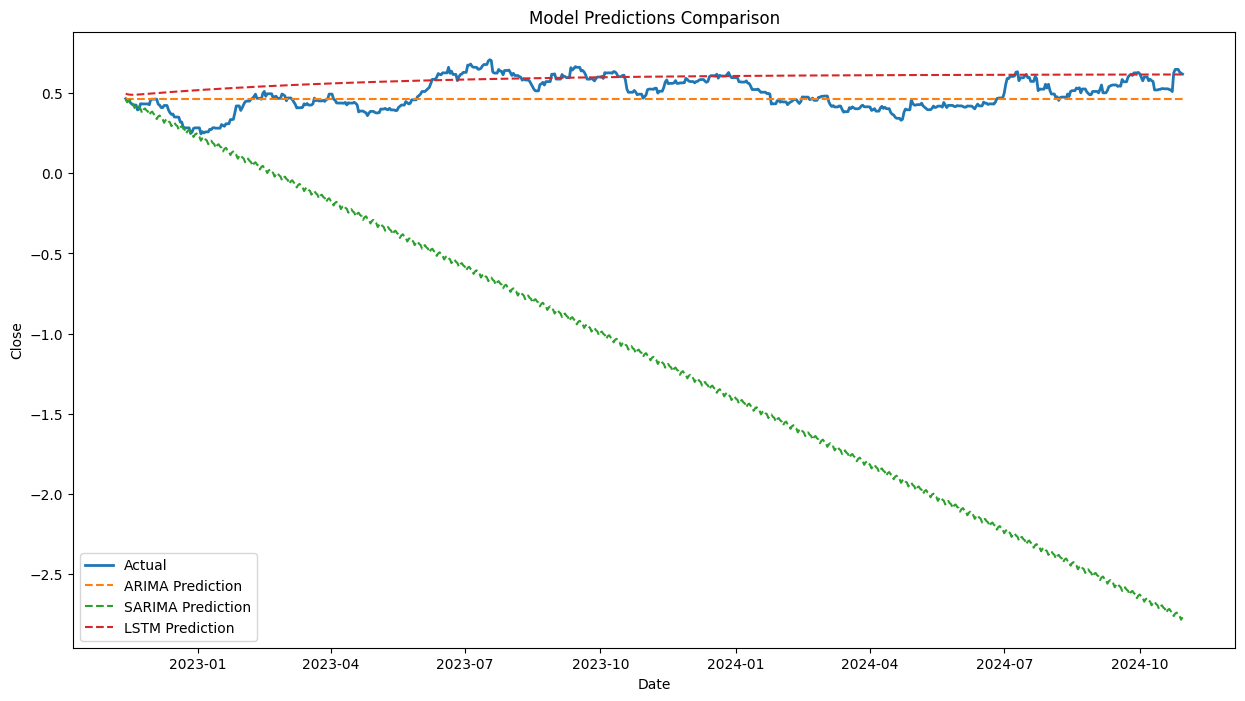

In [24]:
# Plot results
tsla_forecaster.plot_result()

- The plot compares ARIMA, SARIMA, and LSTM models for TSLA stock prediction. 
- LSTM appears to be the most accurate, but all models struggle to capture the actual trend, suggesting limitations in their ability to predict this stock's future values.

### Forecast plot for BND Asset

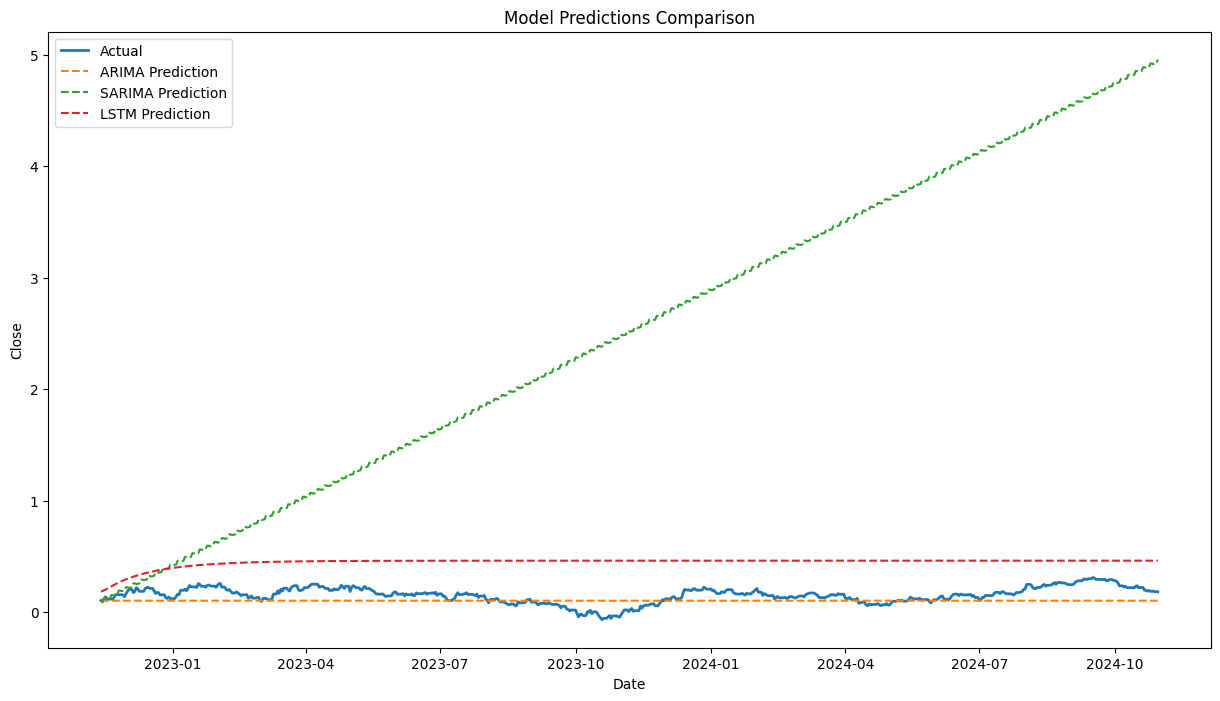

In [25]:
bnd_forecaster.plot_result()

- The plot compares ARIMA, SARIMA, and LSTM models for BND stock prediction. 
- LSTM appears to be the most accurate, but all models struggle to capture the actual trend, suggesting limitations in their ability to predict this stock's future values.

### Forecast plot for SPY Asset

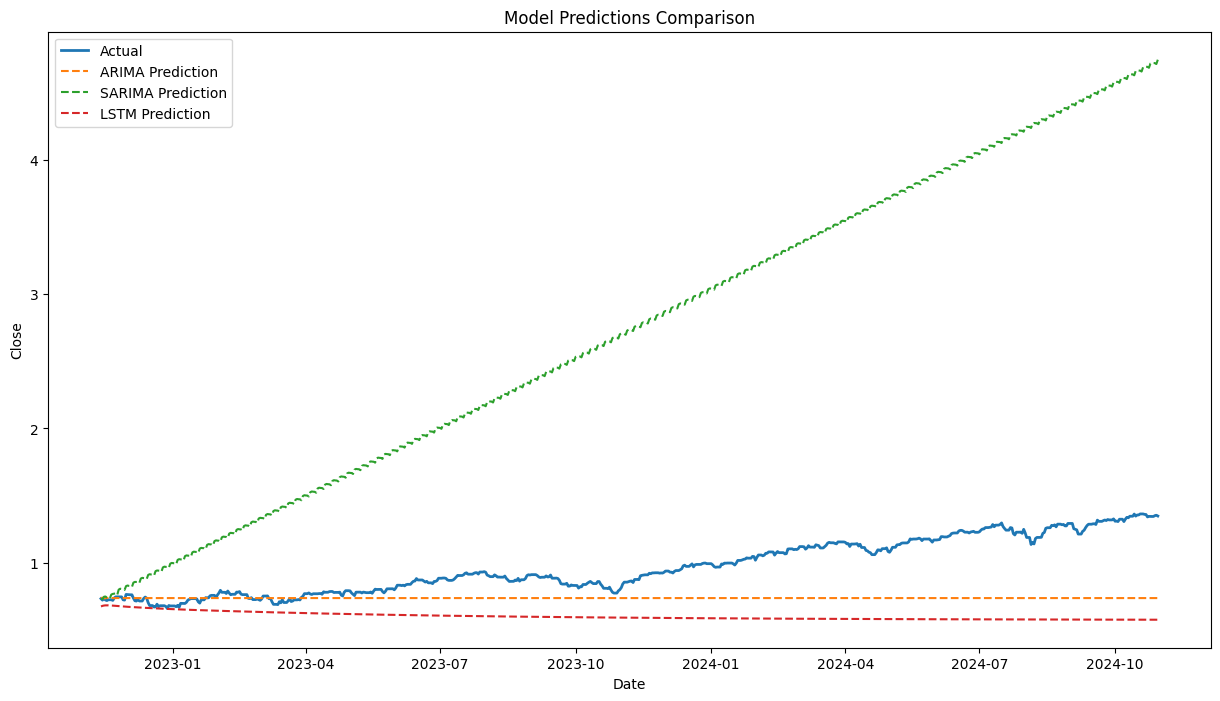

In [26]:
spy_forecaster.plot_result()

- The plot compares ARIMA, SARIMA, and LSTM models for SPY stock prediction. 
- LSTM appears to be the most accurate, but all models struggle to capture the actual trend, suggesting limitations in their ability to predict this stock's future values.